In [40]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'bank-full.csv'
df = pd.read_csv(file_path, encoding='ascii')

print(df.head())
# Checking the data types and basic info
print(df.info())

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (tota

In [41]:
df = pd.read_csv('bank-full.csv', delimiter=';', encoding='ascii')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [42]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

correlation_matrix = encoded_df.corr()
print(correlation_matrix)

                          age   balance       day  duration  campaign  \
age                  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance              0.097783  1.000000  0.004503  0.021560 -0.014578   
day                 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration            -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign             0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays               -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous             0.001288  0.016674 -0.051710  0.001203 -0.032855   
job_blue-collar     -0.044002 -0.048757 -0.022898  0.009637  0.008986   
job_entrepreneur     0.021792  0.009642 -0.002312 -0.001327  0.002128   
job_housemaid        0.086650  0.001661  0.003955 -0.008046  0.003097   
job_management      -0.023571  0.067797  0.019021 -0.008323  0.016686   
job_retired          0.447378  0.046900 -0.010123  0.026032 -0.030913   
job_self-employed   -0.008093  0.017850  0.005062  

In [45]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculating the correlation matrix again
correlation_matrix = encoded_df.corr()
print(correlation_matrix)

                          age   balance       day  duration  campaign  \
age                  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance              0.097783  1.000000  0.004503  0.021560 -0.014578   
day                 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration            -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign             0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays               -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous             0.001288  0.016674 -0.051710  0.001203 -0.032855   
job_blue-collar     -0.044002 -0.048757 -0.022898  0.009637  0.008986   
job_entrepreneur     0.021792  0.009642 -0.002312 -0.001327  0.002128   
job_housemaid        0.086650  0.001661  0.003955 -0.008046  0.003097   
job_management      -0.023571  0.067797  0.019021 -0.008323  0.016686   
job_retired          0.447378  0.046900 -0.010123  0.026032 -0.030913   
job_self-employed   -0.008093  0.017850  0.005062  

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = encoded_df.drop(columns=['balance','age','day', 'duration', 'campaign', 'pdays', 'previous'])  # Features
y = encoded_df['balance']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(coefficients)
print(intercept)

[   37.96316793   238.95951795   121.70238673   290.26608197
   622.25186269   290.59854588   -53.48773669    -3.81294903
    92.65535664   207.93092686   113.84572      262.10782062
   127.8814339     12.07918206   352.96173748   254.40738813
 -1320.34107272  -217.60124311  -548.09031346   341.17797002
   -66.58822512  -341.62543348   292.53976756  -361.63145581
  -712.78409874  -587.86880015   104.06941461   137.5872474
  -336.15519507   856.92409814   443.42148023    19.7794924
   107.76197186   162.45330876    55.0418669    202.76516335]
1246.3679027896196


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating R-squared and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Mean Squared Error:', mse)

R-squared: 0.043169448036583735
Mean Squared Error: 9373843.263499625


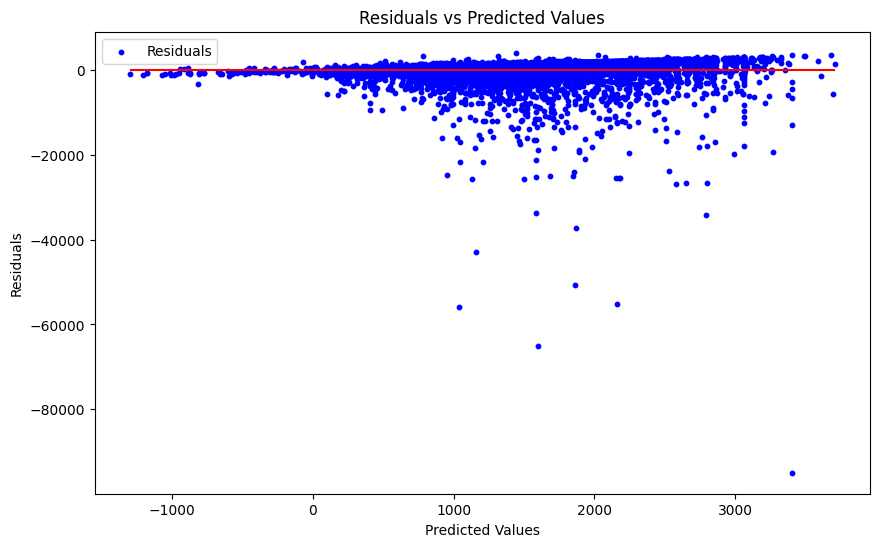

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuals')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

In [50]:
from sklearn.linear_model import ElasticNet
import joblib

# Setting up the Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fitting the model to the training data
elastic_net_model.fit(X_train, y_train)

# Saving the model to a .pkl file
model_filename = 'elastic_net_model.pkl'
joblib.dump(elastic_net_model, model_filename)

# Performing inference on the test set
y_pred_elastic = elastic_net_model.predict(X_test)

print('Model saved as:', model_filename)
print('Predictions on test set:', y_pred_elastic[:5])

Model saved as: elastic_net_model.pkl
Predictions on test set: [1105.84159469 1312.22673282 1453.2555888  1736.53554634 1446.05901217]
